# Tree Model

## Introduction

機器學習中的樹模型（Tree Model）是一類基於樹狀結構的算法，包括決策樹（Decision Tree）、隨機森林（Random Forest）、梯度提升樹（Gradient Boosting Trees）等。這些模型以樹狀結構來進行數據的劃分，從而進行預測任務。

樹的模型可以用來分類也可以用來做回歸分析。而decision tree在這方面的專有名詞叫做Classification and Regression Tree (CART)。

## 決策樹（Decision Tree）

### Tree Concept

Tree 的模型解釋性非常好，因為推理過程能讓人快速理解。但壞處在於容易過度擬合

來舉個例子：

想像一下你是一個披薩公司（像是必X客、達X樂）的資料科學家，你成功建立一個模型能預測披薩是美味的披薩還是難吃的披薩，假設使用在烤披薩的中間過程中的兩個量測數值：溫度以及濕度來建立的模型為：

模型的決策邊界： -100 + 6*溫度 + 3*濕度 = 0

-100 + 6*溫度 + 3*濕度 > 0 預測是一個美味的披薩

-100 + 6*溫度 + 3*濕度 < 0 預測是一個難吃的披薩

你會發現你的主管根本聽不懂你在說什麼，對於披薩公司來說有很低的參考價值。

但！如果你今天改變你的說法跟你的老闆說，你發現在烘烤披薩的過程中，只要溫度維持在120–125度，濕度維持在5%-7%，就會是一個美味的披薩。你的老闆跟前線人員馬上能聽懂這句話的意思，而且會覺得你很專業，開始更重用資料分析在披薩公司，即使這樣的準確度可能沒有比上面提到的多項式模型還精準，但常常在真實環境中模型的“可解釋性(Interpretability)”是很重要的，而決策樹就是一個解釋性能力很強的模型。



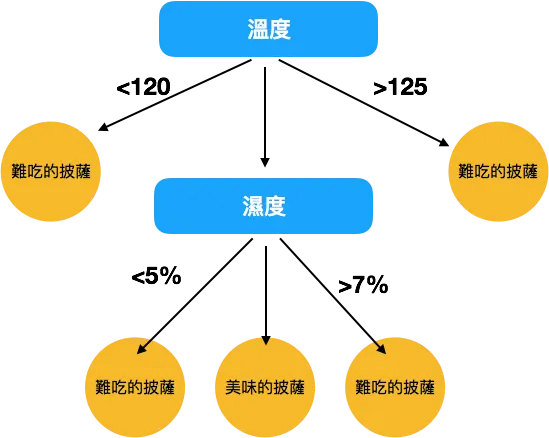

在訓練過程中決策樹會問出一系列的問題像是溫度是否>125 ，濕度是否<5%之類的是非問題。首先會從最後上方的樹根開始將資料的特徵將資料分割到不同邊(比方說依據溫度將資料切成三份)，分割的原則是：這樣的分割要能得到最大的資訊增益(Information gain, 簡稱IG)。然後繼續將這些資料的特徵，按照不同條件判斷式，分類到不能再分類為止，也因為這樣一層一層分支的結構，這個演算法才會叫做decision tree。



決策樹會根據訓練資料產生一棵樹，依據訓練出來的規則來對新樣本進行預測。

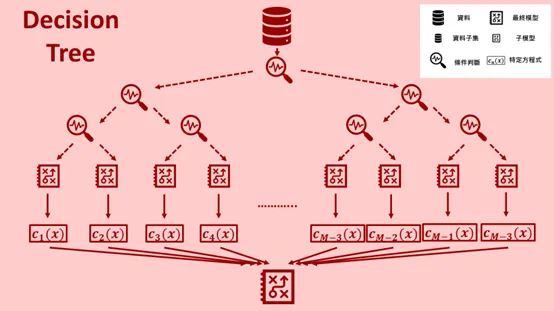


對於decision tree，從圖片裡可以看到，輸入資料後他會依照每一層不同的條件判斷式將資料做分類，直到沒辦法再分下去為止，就產會產生一個子模型，也就是圖中圓圈的部分。



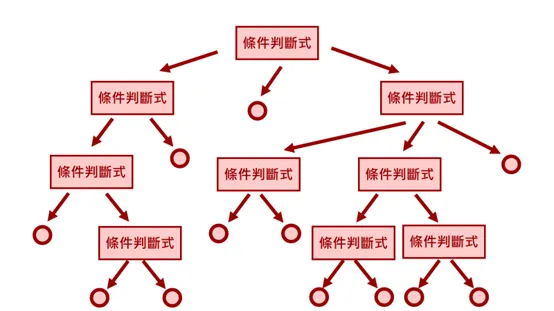

所以我們可以根據這樣遞迴的邏輯將我們整個tree分解到只剩下葉子為止。



一個實際例子：

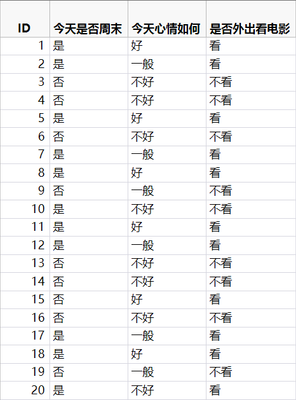

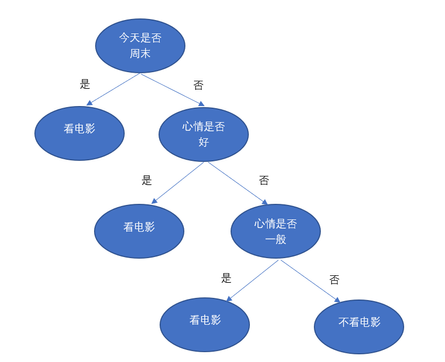

透過樣本數據的學習，可以發現每個變量節點都有一個具體的判斷指標，如週末、非週末，心情好、一般、不好，我們將其稱之為「閾值」。

如果是數值型的變量節點，則閾值一般為一個具體的值，如年齡是否超過30歲對結果進行判斷，則30稱為閾值。    

決策樹的生成一般分為兩步驟，透過學習已知樣本的分類結果來實現：

1. 一般來說，變量的節點無法給出結果的判斷時，節點會一分為二，如果不是二叉樹則一分為多，直到分無可分。如該樣本數據中，“今天是否週末”無法直接判斷看或者不看電影，則加入新的變量節點“心情如何”再進行拆分，直至無法拆分為止；
2. 選擇合適的閾值，可讓誤分類率最小。

### 如何生成 Tree

這個問題需要拆解成兩個子問題來分析，第一是分割的依據是什麼？第二是怎麼判定最好的分割？

簡單來說是：每一次的分割要能得到最大的資訊增益(Information gain, 簡稱IG)

分類樹與回歸樹的評估指標不一樣，這裡著重先說明分類模型的決策樹，回歸樹則是大同小異。

#### 分割的評估指標是什麼？

決策樹演算法可以使用不同的方式來評估分枝的好壞(亂度)，以使用最具意義的特徵來做分割，需要透過信息增益(information gain)來判斷。簡單來說， 信息增益大的話那麼這個特徵對於分類來說很重要，很關鍵的一切，就能把數據分得很乾淨， 決策樹就是依據訓練資料找出合適的規則，最終生成一個規則樹來決策所有事情，其目的使每一個決策能夠使訊息增益最大化。

在分類模型中決策樹是以亂度作為決策樹生成時候的評估指標，詳細內容在前一堂課有多加說明。但是迴歸樹透過是 MSE 或 MAE 來評估模型，並找出誤差最小的值作為樹的特徵選擇與切割點。其中前者是均方差，後者是和均值之差的絕對值之和。



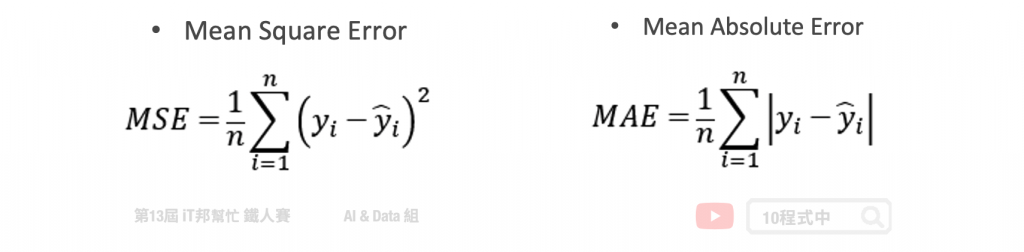

#### 如何找到最好的分割？

信息增益是特徵選擇的一個重要指標，它定義為一個特徵能夠為分類系統帶來多少信息，帶來的信息越多，說明該特徵越重要，相應的信息增益也就越大。

決策樹是以一個貪婪法則來決定每一層要問什麼問題，目標是分類過後每一群能夠很明顯的知道是屬於哪一種類別。



就好比我們評估今天比賽是否舉行，天氣因子可能佔比較大的因素，而 Co2 的濃度高低可能佔的因子程度較低。因此在第一層的決策中以天氣的特徵先進行第一次的決策判斷。接著第二層再從所有特徵中尋找最適合的決策因子，直到設定的最大樹的深度即停止樹的生長。

等一下，貪婪法則是什麼？

決策樹模型中常用的貪婪法則（greedy algorithm）是一種在每個分支選擇過程中，都優先選擇最佳或看似最佳的選項的方法。這種選擇是"貪婪的"，因為它僅根據當前可用的信息做出當前最好的決策，不會考慮長期的整體最優解。

當構建決策樹時，會選擇一個特徵和一個閾值對數據進行分割，使得分割後的子集比分割前更加"純淨"。這裡的"純淨"通常是通過評估分割的信息增益（Information Gain）、基尼不純度（Gini Impurity）、或熵（Entropy）等指標來衡量的。貪婪法則在這個過程中的作用是在所有可能的特徵和閾值組合中，選擇使得"純淨度"提升最大的那個選項。

例如，假設你正在處理一個用於預測是否下雨的數據集，特徵包括溫度、濕度和風速等。在建立決策樹的每個節點時，你會考慮這些特徵，根據貪婪法則，選擇可以最大化信息增益的特徵和閾值來進行分割。








延續上面的例子，以分類問題來說假設要評估明天比賽是否舉行。在樹的第一層節點中我們要從已知的兩個特徵分別是溫度與特徵選一個作為該層的決策因子。假設目前訓練集有五筆資料，其中正常舉行的有兩筆資料，取消舉行的有三筆資料。在樹的結構中左子樹為決策正常取行，而右子樹是決策取消舉行。我們可以發現當特徵為天氣的時候可以一很清楚的將這兩類別完整分開，因此我們會將天氣作為這一層判斷的因子。

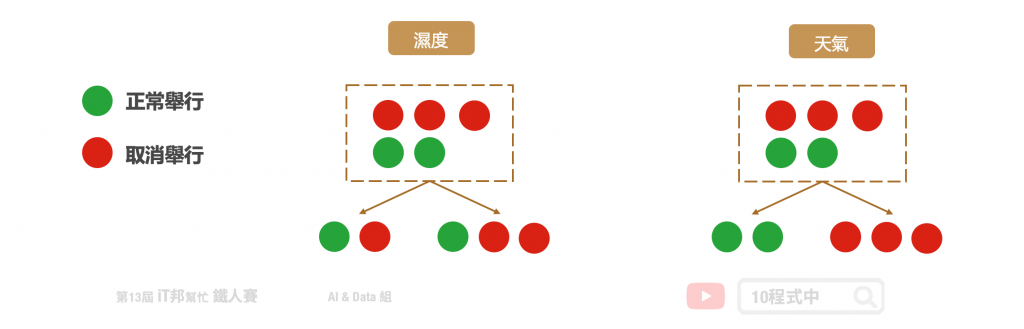

這就是決策樹在生成中的貪婪機制。然而要如何去判斷每次決策的好壞，就必須依靠亂度的評估指標。

#### 何時會停止分割？

而整個Decision Tree演算法的停止機制就是

1. 當我們impurity function等於0(分類乾淨，沒有錯誤點)

2. 剩下的資料label一模一樣沒辦法區分。

### Tree 可用於分類以及迴歸

在 Sklearn 套件中決策樹演算法是採用 CART (Classification and Regression Tree) 演算法，並且可以被拿來做分類和迴歸的預測。在決策樹的每一個節點上都是採用二分法，也就是每一個決策節點只分枝出兩個子節點。並且不斷地往下拓展，直到設定的最大深度為止，此時最大深度的節點稱為葉節點即為模型的預測輸出。



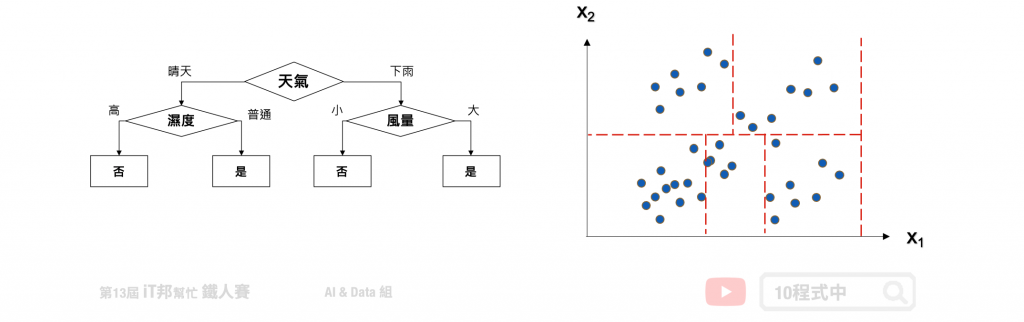

#### 分類任務

程式實作：

一個決策樹會根據訓練資料自動產生一棵樹。決策樹會根據資料產生很多樹狀的規則，最終訓練出來的規則會對新樣本進行預測。

Parameters:

- criterion: 亂度的評估標準，gini/entropy。預設為gini。
- max_depth: 樹的最大深度。
- splitter: 特徵劃分點選擇標準，best/random。預設為best。
- random_state: 亂數種子，確保每次訓練結果都一樣，splitter=random 才有用。
- min_samples_split: 至少有多少資料才能再分
- min_samples_leaf: 分完至少有多少資料才能分

Attributes:

- feature_importances_: 查詢模型特徵的重要程度。

Methods:

- fit: 放入X、y進行模型擬合。
- predict: 預測並回傳預測類別。
- score: 預測成功的比例。
- predict_proba: 預測每個類別的機率值。
- get_depth: 取得樹的深度。


In [7]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

# 加載Iris資料集
iris = load_iris()
X, y = iris.data, iris.target

# 將數據集分成訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 創建DecisionTreeClassifier對象
# criterion: 決策樹劃分的準則，'gini'是基尼不純度，'entropy'是信息增益
# max_depth: 決策樹的最大深度，防止過擬合
# random_state: 隨機種子，用於確保結果的可重複性
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

# 用訓練資料訓練模型
clf.fit(X_train, y_train)




DecisionTreeClassifier(max_depth=3, random_state=42)

Test Accuracy: 1.00


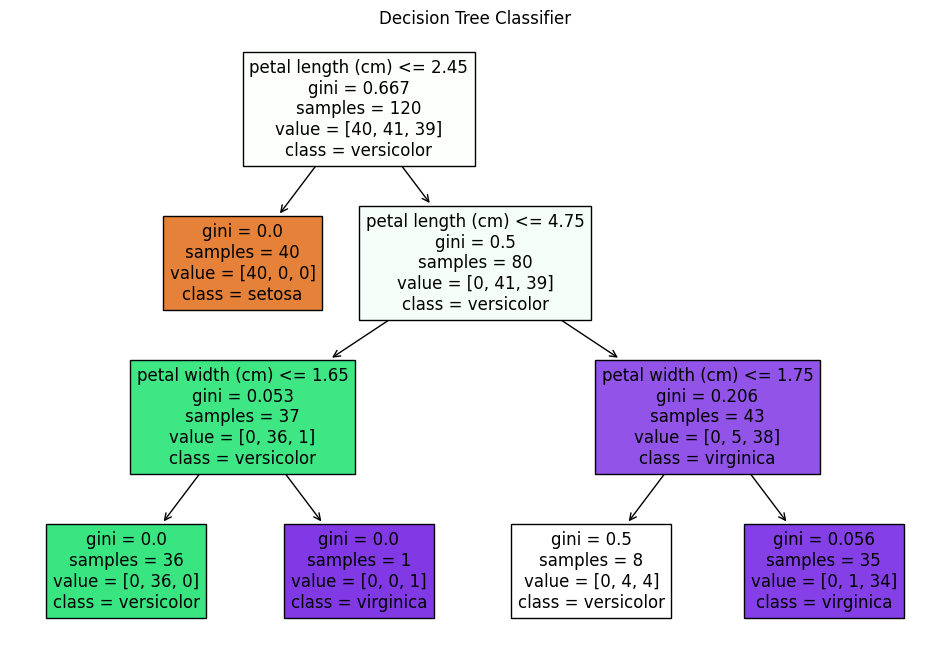

In [8]:
# 評估模型在測試集上的準確性
accuracy = clf.score(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# 可視化決策樹
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree Classifier")
plt.show()

#### 迴歸任務

 Tree 也可以用於迴歸任務當中，也就是做連續性數值的任務。這時候他就就做迴歸樹。

決策樹迴歸方法與分類有點類似差別僅在於評估分枝好壞的方式不同。透過樹的展開，並用葉節點的均值作爲預測值。從根節點開始，對樣本的某一特徵進行測試。經過評估後，將樣本分配到其子結點。此時每一個子節點對應著該特徵的一個值。依照這樣方式進行，直至到達葉結點。此時誤差值要最小化，並且越接近零越好。



參考：https://zhuanlan.zhihu.com/p/82054400

以下舉一個例子假設 x 是輸入 y 是輸出，我們可以在一個平面上繪製出資料與正確答案間的分佈。假設迴歸樹的最大深度設定兩層。首先在第一層中會將所有的資料從中間切一刀此斷點為 x=0.496 當大於設定的值的數據點會繼續往右子樹下去延伸，反之小於 0.496 的資料點會往左子樹走。此時將會切出一個分支出來並往下擴展並形成第二層的決策分支。一直不斷持續拓展直到設定的最大深度終止，此時的節點即為葉節點也就是最終的模型輸出值。



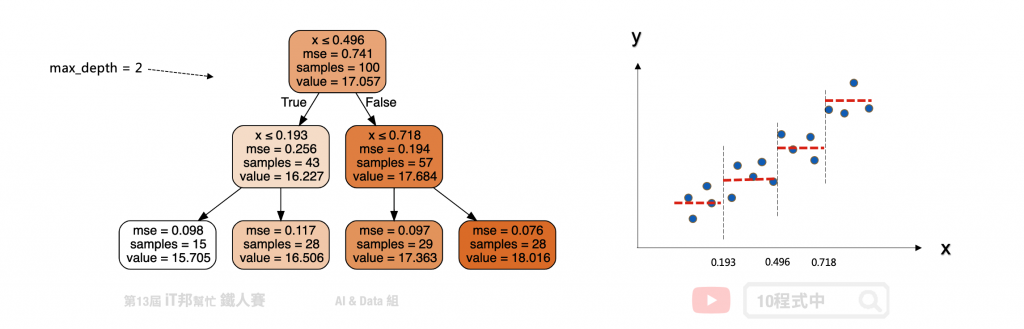

以下是另外一個範例，但可以看到，圖形容易過度擬合

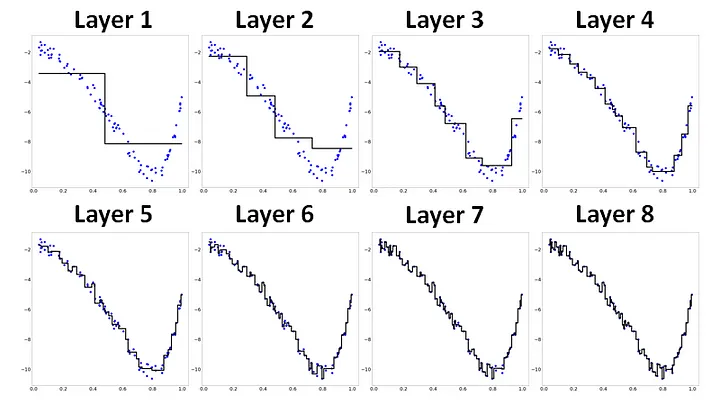

以下是程式碼實作：

Parameters:

- criterion: 評估切割點指標，mse/friedman_mse/mae。
- max_depth: 樹的最大深度。
- splitter: 特徵劃分點選擇標準，best/random。預設為best。
- random_state: 亂數種子，確保每次訓練結果都一樣，splitter=random 才有用。
- min_samples_split: 至少有多少資料才能再分
- min_samples_leaf: 分完至少有多少資料才能分

Attributes:

- feature_importances_: 查詢模型特徵的重要程度。

Methods:

- fit: 放入X、y進行模型擬合。
- predict: 預測並回傳預測類別。
- score: 預測成功的比例。
- get_depth: 取得樹的深度。


In [12]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

# 加載Iris資料集
iris = load_iris()
X, y = iris.data, iris.target

# 將數據集分成訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 創建DecisionTreeRegressor對象
# criterion: 劃分的準則，'mse'是均方誤差
# max_depth: 控制決策樹的最大深度，防止過擬合
# random_state: 確保結果的可重複性
regressor = DecisionTreeRegressor(criterion='squared_error', max_depth=3, random_state=42)

# 用訓練資料訓練模型
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

Test R^2 Score: 0.99


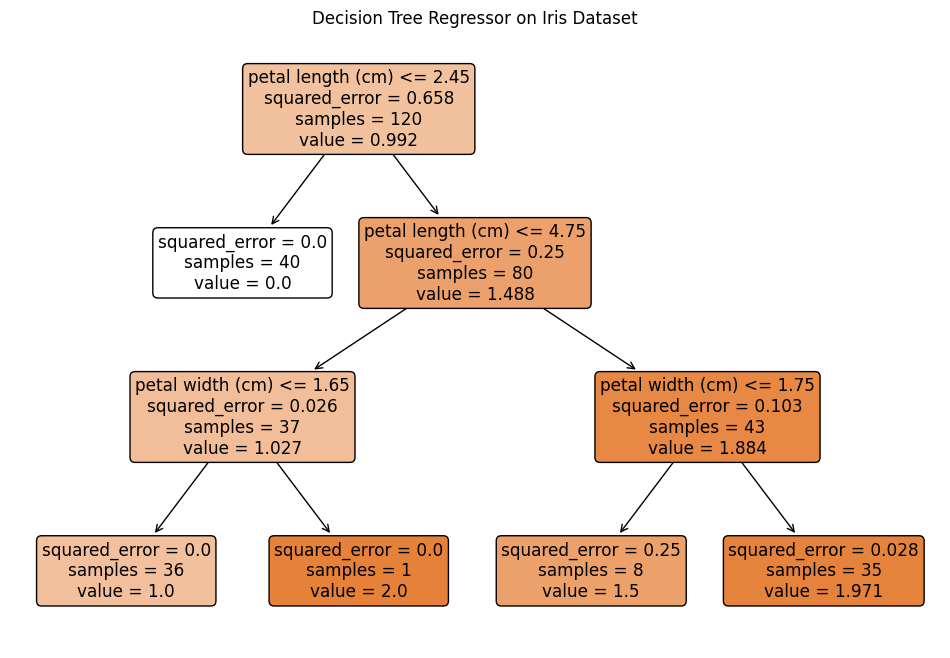

In [13]:
# 評估模型在測試集上的性能
r2_score = regressor.score(X_test, y_test)
print(f"Test R^2 Score: {r2_score:.2f}")

# 可視化決策樹
plt.figure(figsize=(12, 8))
tree.plot_tree(regressor, feature_names=iris.feature_names, filled=True, rounded=True)
plt.title("Decision Tree Regressor on Iris Dataset")
plt.show()


### Tree 不同分割演算法

Tree 當然有不同用於評估分割的算法，不同的計算方式會使模型訓練結果有所不同。

ID3 (Iterative Dichotomiser 3)

- **概念:** ID3 是一種基於信息增益（Information Gain）的演算法。信息增益用於選擇最能將數據集分割成不同類別的特徵。
- **計算:**
  - 信息增益衡量的是選擇某特徵作為分割點後，信息熵（Entropy）的減少量。
  - 信息熵是一種衡量不確定性的指標。當節點的熵越小，說明該節點的資料越同質。
- **優點:** 計算簡單，適用於小型數據集。
- **缺點:** 偏好多值屬性，可能導致過度分支（過擬合），不能直接處理連續特徵和缺失值。



C4.5

- **概念:** C4.5 是 ID3 的改進版，解決了 ID3 的一些局限性。它引入了信息增益比率（Gain Ratio），以考慮特徵的分支數。
- **計算:**
  - 信息增益比率是在信息增益的基礎上，除以分支數的對數，從而抵消了特徵值多寡對信息增益的影響。
  - 它還支持連續數據處理，並能夠處理缺失值。
- **優點:** 克服了 ID3 的偏好多值屬性問題，支持連續和缺失值處理，適合中型數據集。
- **缺點:** 計算相對複雜。




CHAID (Chi-squared Automatic Interaction Detector)

- **概念:** CHAID 使用卡方檢驗來決定如何分割數據集。它通過計算每個節點中類別的卡方值來選擇最佳特徵。
- **計算:**
  - 卡方檢驗用於測試觀察到的類別頻率與期望頻率之間的差異。
  - P值越小，表示特徵與類別之間的關聯越強，越適合作為分割特徵。
- **優點:** 適合於大數據集，能夠自動選擇分支的最佳數目，適用於分類問題。
- **缺點:** 計算複雜，對於具有小樣本量的數據可能不夠穩定。


何時使用不同算法

- **ID3:** 適合於簡單和小型的分類問題，當數據集的規模較小且特徵都是離散值時使用。
- **C4.5:** 當需要處理連續特徵或有缺失值的數據集時，C4.5 是一個較好的選擇。
- **CART:** 當需要處理分類和回歸問題時，尤其是在需要對大規模數據集進行建模時使用。也是隨機森林和梯度提升樹等集成學習方法的基礎。
- **CHAID:** 當需要對分類問題進行更精細的多分支劃分時使用，適合大數據集。


CART (Classification And Regression Tree)

- **概念:** CART 是一種可用於分類和回歸的決策樹演算法。其分類過程使用基尼不純度（Gini Impurity）來選擇最佳分割特徵。
- **計算:**
  - 基尼不純度衡量的是將數據點錯分的概率，值越小表示數據的純度越高。
  - 對於迴歸任務，CART 使用均方誤差（MSE）來衡量節點的純度。
- **優點:** 能夠處理分類和回歸問題，適用於大規模數據集，易於解釋。
- **缺點:** 容易過擬合，通常需要後期的剪枝（Pruning）。


參考：https://medium.com/%E4%BA%BA%E5%B7%A5%E6%99%BA%E6%85%A7-%E5%80%92%E5%BA%95%E6%9C%89%E5%A4%9A%E6%99%BA%E6%85%A7/decision-tree-%E6%B1%BA%E7%AD%96%E6%A8%B9-%E5%96%AE%E7%B4%94-%E5%BF%AB%E9%80%9F-%E8%A7%A3%E9%87%8B%E6%80%A7%E9%AB%98%E7%9A%84%E6%B1%BA%E7%AD%96%E8%A1%93-ef28e0e75a55

### Tree 的優缺點

建立決策樹的過程就是不斷的尋找特徵進行決策，透過這些決策盡量的使這些資料被分為同一個類別，且試著讓混亂程度越小越好。切記樹的深度越深不一定越好，他可能會造成過度擬合的問題。訓練好的模型我們能夠視覺化決策樹的結構，相對的可解釋性就變高。此外與其它的ML模型比較起來，決策樹執行速度是它的一大優勢。因為是樹狀結構，因此在進行機器學習的時候每個決策階段都相當的明確清楚，不是 0 就是 1。



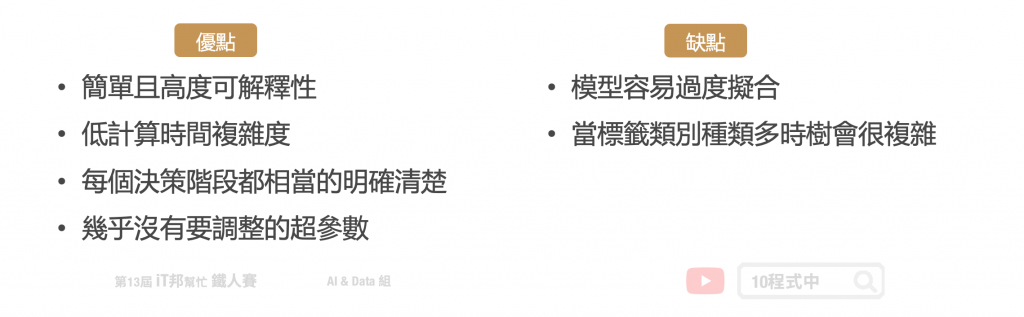

假設我們生成一個 f(x) = 3x+15 + noise 的資料，其中 noise 為一個 0~1 之間的隨機數。從以下的測試可以看出隨著決策樹深度的增加，決策樹的擬合能力不斷上升。決策樹已經不僅僅擬合了我們的線性函式 3x+15，同時也擬合了我們添加的噪音(noise)。



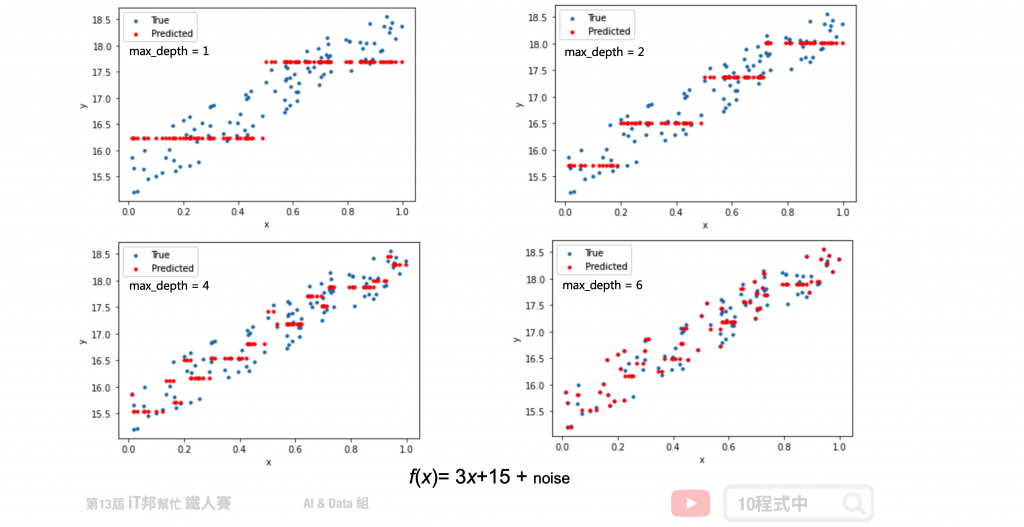

### 小結

樹模型的核心思想是通過一系列的二分法（或多分法）將數據集劃分成更小的子集。這些劃分的目的是使每個子集內的數據點具有更高的同質性（或更低的熵/基尼不純度）。樹模型的構建通常涉及以下幾個步驟：

1. 選擇最佳劃分特徵：根據某種準則（如信息增益、基尼不純度等），選擇最佳特徵來劃分數據。

2. 劃分數據：根據選定的特徵及其值域將數據集劃分為若干個子集。

3. 遞歸構建子樹：對每個子集重複上述過程，直到滿足停止條件（如達到樹的最大深度或子集數據點數目過少）。

4. 預剪枝或後剪枝(Pruning)：為避免過擬合，可能會在樹的構建過程中進行預剪枝或在構建完成後進行後剪枝。



### 參考

參考資源：
1. [機器學習_學習筆記系列(24)：決策樹分類(Decision Tree Classifier)
](https://tomohiroliu22.medium.com/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E5%AD%B8%E7%BF%92%E7%AD%86%E8%A8%98%E7%B3%BB%E5%88%97-24-%E6%B1%BA%E7%AD%96%E6%A8%B9%E5%88%86%E9%A1%9E-decision-tree-classifier-f79eb277e7a1)

2. [機器學習_學習筆記系列(25)：決策樹回歸(Decision Tree Regressor)
](https://tomohiroliu22.medium.com/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E5%AD%B8%E7%BF%92%E7%AD%86%E8%A8%98%E7%B3%BB%E5%88%97-25-%E6%B1%BA%E7%AD%96%E6%A8%B9%E5%9B%9E%E6%AD%B8-decision-tree-regressor-ebab62eb24ea)

3. [機器學習入門：通俗易懂解讀決策樹
](https://community.jmp.com/t5/JMP-Blog/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92%E5%85%A5%E9%96%80-%E9%80%9A%E4%BF%97%E6%98%93%E6%87%82%E8%A7%A3%E8%AE%80%E6%B1%BA%E7%AD%96%E6%A8%B9/ba-p/753561)

4. [Decision tree 決策樹 — 單純、快速、解釋性高的決策術
](https://medium.com/%E4%BA%BA%E5%B7%A5%E6%99%BA%E6%85%A7-%E5%80%92%E5%BA%95%E6%9C%89%E5%A4%9A%E6%99%BA%E6%85%A7/decision-tree-%E6%B1%BA%E7%AD%96%E6%A8%B9-%E5%96%AE%E7%B4%94-%E5%BF%AB%E9%80%9F-%E8%A7%A3%E9%87%8B%E6%80%A7%E9%AB%98%E7%9A%84%E6%B1%BA%E7%AD%96%E8%A1%93-ef28e0e75a55)

5. [ML入門（十六）決策樹(Decision Tree)
](https://medium.com/chung-yi/ml%E5%85%A5%E9%96%80-%E5%8D%81%E5%85%AD-%E6%B1%BA%E7%AD%96%E6%A8%B9-decision-tree-59e5fb6a0f56)

6. [[Day 12] 決策樹 (Decision tree)](https://ithelp.ithome.com.tw/articles/10271143)

7. [Regression Tree 回归树](https://zhuanlan.zhihu.com/p/82054400)

8. [[資料分析&機器學習] 第3.5講 : 決策樹(Decision Tree)以及隨機森林(Random Forest)介紹](https://medium.com/jameslearningnote/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC3-5%E8%AC%9B-%E6%B1%BA%E7%AD%96%E6%A8%B9-decision-tree-%E4%BB%A5%E5%8F%8A%E9%9A%A8%E6%A9%9F%E6%A3%AE%E6%9E%97-random-forest-%E4%BB%8B%E7%B4%B9-7079b0ddfbda)

# Ensemble Trees

https://colab.research.google.com/drive/1iLmMMbftu0LK5e7PhEcm1V9CVLQbZlQT#scrollTo=jWY0HsretYvN

三種Ensemble Methods，分別為Bootstrap Aggregation、Adaptive Boost、Gradient Boost。其中在這些演算法當中，我們知道他們都可以拿來應用在分類和回歸上的問題。而對於這些Ensemble Method，他們的Base Leaner為Decision Tree的話，我們會把他額外拿出來探討。

Bootstrap Aggregation + Decision Tree →Random Forest

Adaptive Boost + Decision Tree →Adaptive Boost Decision Tree

Gradient Boost + Gradient Tree →Adaptive Boost Decision Tree。

## 隨機森林 (Random Forest)


隨機森林是透過 Ensemble 許多 Tree 的方式所組成，一樣有分類模型跟回歸模型。分類模型集成的方式通常用 Voting, 回歸模型集成的方式則是用 Averaging

### Random Forest Classifier

決策樹的缺點之一，就是很容易過度擬合（overfitting）。既然一棵樹容易見樹不見林，容易產生偏見，那要不多建幾棵樹來看看？這種方法就是所謂的隨機森林（Random Forest）。隨機是指在建構決策樹時所使用的資料跟特徵都是隨機的，而森林是指產生很多棵樹，而最後的分類結果，則由各棵樹採用多數決的方式來決定，頗有「三個臭皮匠，勝過一個諸葛亮」之味道。



在近幾年隨機森林非常受到青睞，被運用在大量的機器學習應用中，它的效能、預測能力都很強，而且非常容易使用，另外隨機森林還能更去觀察每一個特徵的重要度。直覺來說，你可以把隨機森林當作是多個決策樹組合而成的，這個在機器學習領域稱為Ensemble中文可以叫整體或集成。相較於一般機器學習演算法是去培育一個天才模型的概念往往會有一些的限制，比如說這個天才模型可能在某些領域會有偏差或是不好的行為。整體機器學習(Ensemble learning)演算法則是結合多個弱學習器來建構一個強穩的模型，而這種模型比較不會有偏差或是發生高度適合(Overfit)。簡單來說機器學習演算法有兩種，一種是天才領導型的、一種是眾人投票型的，而隨機森林就是屬於眾人投票型的。



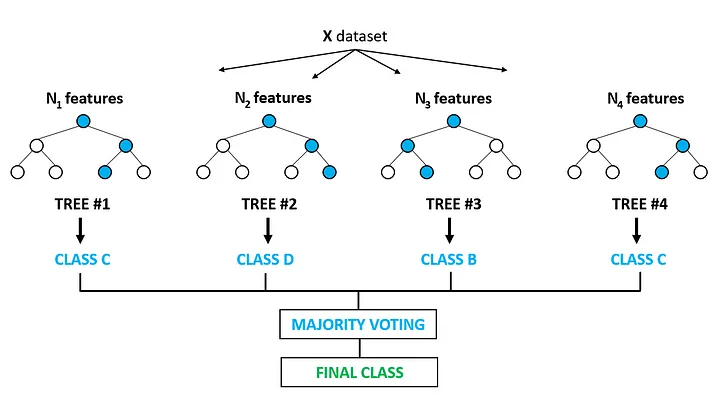

一顆顆 Tree 叫做 Base learner

一個森林叫做 Strong learner

在此我們先回顧一下Bagging，假設我們有一個資料集D，輸入資料為x輸出資料為y，然後我們將總共執行M個迴圈。而在每一次執行迴圈的時候，我們的第一步就是從資料集D裡面隨機挑選N筆資料，挑選到的資料是可以重複的。

接下來我們就運用我們所挑到的這N筆資料Train出一個分類器。而在這裡我們選用的Base Learner為Decision Tree。所以如果我們執行M個迴圈，我們總共會有M個Decision Tree。最後我們再將這M個Decision Tree以Voting的方式把他結合起來，就可以得到我們的Strong Learner — Random Forest。

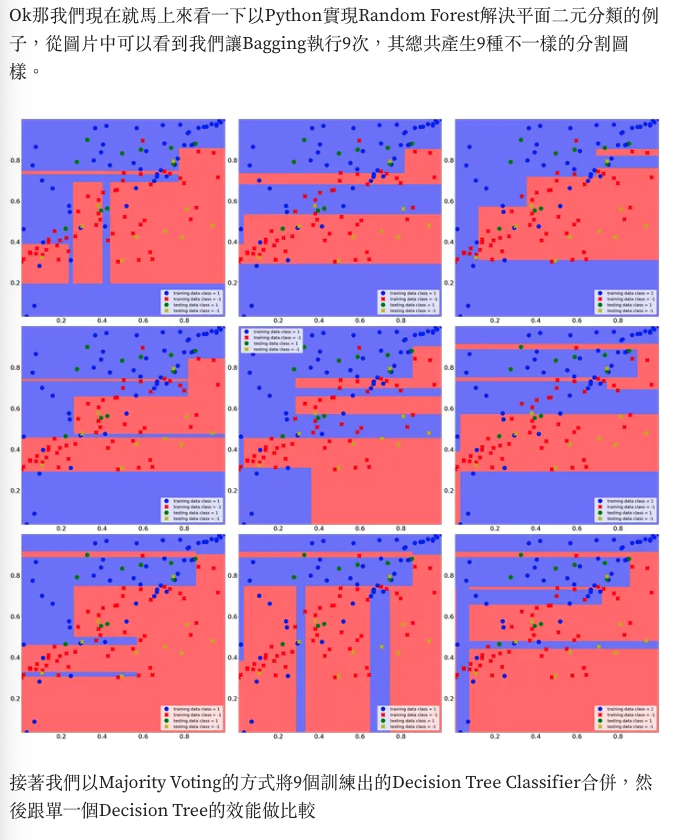

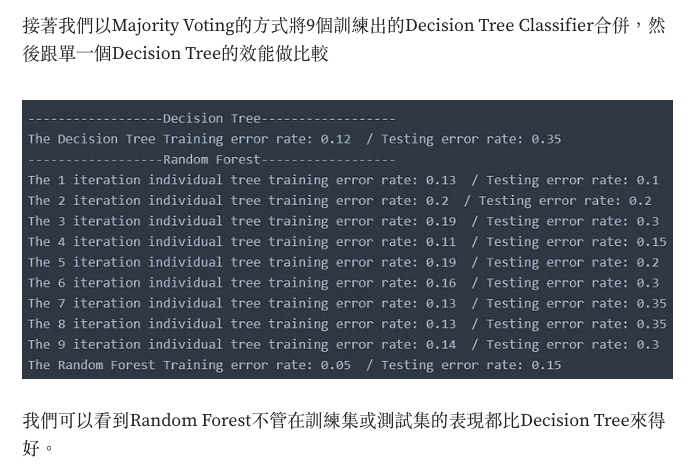

在實務上使用隨機森林的程式很簡單，你所需要關心的參數主要只有n_estimators樹木的多寡(你要創造幾個決策樹來投票)，通常越多越好，但運算時間也會拉長。

**Python 實作隨機森林**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 構建隨機森林
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf = rf_clf.fit(X, y)

# 預測
y_pred = rf_clf.predict(X)

# 模型評估
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y, y_pred))


Accuracy: 1.0


### Random Forest Regressor


隨機森林本質是樹模型，一樣可以解決迴歸的問題。

其實概念上來說，其實也是太同小異啦，就是用Bagging方法，隨機抽取資料後再訓練一個regression tree，最後再把這些base learner結合起來。

我們從這N筆資料裡面隨機抽樣N筆，抽取的資料是可以重複的。然後我們就用這些抽出來的資料訓練出一個Regression Tree。結束後就進入下一個迴圈，然後用相同的方式訓練出另一個Regression Tree，直到迴圈執行完M次為止。

而在最後我們得到M個Regression Tree Models後，我們就將這些資料在這M個models的預測結果取平均，最後得出來的就是我們Random Forest Regressor所預測的數值。

回歸樹可以有效解決單一 Decision Tree 因為層數不夠導致的過擬合的狀況。

In [1]:
# 導入所需的庫
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 生成一個隨機迴歸問題
X, y = make_regression(n_features=4, n_informative=2, noise=0.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 創建 Random Forest Regressor 模型
regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # 使用100棵樹

# 訓練模型
regressor.fit(X_train, y_train)

# 進行預測
y_pred = regressor.predict(X_test)

# 計算預測的均方誤差
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# 顯示一些預測結果
print("Actual values:", y_test[:5])
print("Predicted values:", y_pred[:5])


Mean Squared Error: 132.3088738121265
Actual values: [ -4.86577056   9.99467285  17.72636369 -33.78265086 -31.43909214]
Predicted values: [ -1.06516557   8.12441432  27.11345897 -20.4050067  -23.6713602 ]


當你在使用 `RandomForestRegressor` 這個模型時，你可以透過設定不同的超參數來調整模型的行為和性能。這裡是一些常見的超參數及其對模型影響的解釋：

1. **`n_estimators`**:
   - **說明**: 決定森林中樹的數量。更多的樹通常會提高模型的穩定性和預測能力，但同時也會增加計算成本和時間。
   - **預設值**: 通常是100。

2. **`max_depth`**:
   - **說明**: 樹的最大深度。如果這個參數設定得太低，可能會導致模型欠擬合；設定得太高，則可能導致過擬合。如果不設定，樹將繼續擴展直到所有葉子都是純淨的，或者直到包含的樣本少於 `min_samples_split` 樣本為止。
   - **預設值**: 通常是 `None`（即樹將盡可能生長直到所有葉節點純淨或包含的樣本少於 `min_samples_split` 樣本）。

3. **`min_samples_split`**:
   - **說明**: 分割一個內部節點所需的最小樣本數。這個值越大，模型越不可能過擬合，但風險是欠擬合。
   - **預設值**: 通常是2。

4. **`min_samples_leaf`**:
   - **說明**: 葉節點所需的最小樣本數。這個參數對控制過擬合有幫助。設定較大的數字可以讓模型的輸出平滑化，尤其對於迴歸模型尤其有效。
   - **預設值**: 通常是1。

5. **`max_features`**:
   - **說明**: 尋找最佳分割時要考慮的特徵數量。可以設定為整數（直接指定數量），浮點數（作為特徵總數的百分比），`auto`（則為 `sqrt(n_features)`），`sqrt` 或 `log2`。
   - **預設值**: 通常是 `auto`，對於回歸模型，這意味著使用所有特徵。

6. **`random_state`**:
   - **說明**: 控制模型隨機性的來源，確保結果的可重現性。
   - **預設值**: 通常是 `None`，這意味著每次產生的結果都可能不同。

透過調整這些超參數，你可以優化模型以達到更好的性能和更穩定的預測結果。對於不同的數據集和預測任務，可能需要不同的參數設定。通常會透過交叉驗證來找到最佳的參數組合。

參考
1. [機器學習_學習筆記系列(36)：隨機森林分類(Random Forest Classifier)
](https://tomohiroliu22.medium.com/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E5%AD%B8%E7%BF%92%E7%AD%86%E8%A8%98%E7%B3%BB%E5%88%97-36-%E9%9A%A8%E6%A9%9F%E6%A3%AE%E6%9E%97%E5%88%86%E9%A1%9E-random-forest-classifier-bd902dc107c5)

2. [機器學習_學習筆記系列(37)：隨機森林回歸(Random Forest Regressor)](https://tomohiroliu22.medium.com/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E5%AD%B8%E7%BF%92%E7%AD%86%E8%A8%98%E7%B3%BB%E5%88%97-37-%E9%9A%A8%E6%A9%9F%E6%A3%AE%E6%9E%97%E5%9B%9E%E6%AD%B8-random-forest-regressor-a0f7a57c06c4)

## 極限隨機樹(Extremely Randomized Trees)

對於Extra Tree的演算法核心概念，其實和Random Forest很像，他們都會用迴圈產生T個Decision Tree然後再把這T個Base Leaner結合起來。對於他們的差別在於

1. Random Forest中訓練每個Decision Tree的時候，訓練資料是隨機挑選且資料可重複的，而Extra Tree訓練每個Decision Tree的時候，訓練資料和原始資料相同。

2. Random Forest中的Decision Tree在找最適當的切割線的時候，是從當前的Node底下找出一個impurity值最低的解，而Extra Tree中的Decision Tree在找最適當的切割線的時候，是隨機產生K個切割線然後從K條線中選出一個impurity值最低的解。



那回歸呢？

回歸基本上與分類器大同小異，接著我們丟進去Decision Tree進行訓練後，Decision Tree會先呼叫Decision Stump，然後Decision Stump會隨機產生K種組合，如果第一個隨機產生的組合，特徵標記為1，我們就會從x的第一個特徵裡面，從最小值到最大值間隨機產生一個數字。如果第二個隨機產生的組合，特徵標記為3，我們就會從x的第三個特徵裡面，從最小值到最大值間隨機產生一個數字。接下來我們根據這K個組合，找出一個最佳組合，讓其回歸出來的錯誤率最小。

找到最佳組合後Decision Stump就會回傳我們是選擇第幾個特徵作為分割線，然後其數值多少。接下來我們就會根據這個特徵和數值，把當前的資料x和y，拆成兩部分，然後以相同的方式分別將左右兩部分的資料再帶入Decision Tree裡面。而這樣的步驟會直到，我們的樹已達我們設定的最大深度或是左右兩邊的資料都已經達到完美回歸，也就是MSE=0。





所以我們節省了時間

所以說我們可以從第二個差別看到，假使我們今天有N筆資料，每筆資料有M個特徵，如果今天用Random Forest的方法，如果要找到最佳切割線，總共要計算M(N-1)次，如果是Extra Tree的方法，我們只要做K次。

想像一下如果我們今天的資料量非常龐大，有一百萬筆，然後每筆又有十個特徵，如果用Random Forest的方法，那不是在第一回找分割點的時候，就要做9999990次運算嗎。所以如果運用Extra Tree我們可以大大的把建立一個Node所需的運算次數降到K次。

我們可以看到運用Ensemble Learning的方式，其訓練集和測試集的表現都比使用單一個Decision Tree來得好。而我們可以特別注意Extra Tree的執行時間，因為其式隨機挑選分割線，所以其執行時間比Random Forest的一半還要少。



以下是分類器程式碼

In [3]:
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 生成分類數據
X, y = make_classification(n_features=4, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 創建 Extra Trees Classifier 模型
classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)

# 訓練模型
classifier.fit(X_train, y_train)

# 進行預測
y_pred = classifier.predict(X_test)

# 計算準確率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.96


以下是迴歸程式碼

In [2]:
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 生成迴歸數據
X, y = make_regression(n_features=4, n_informative=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 創建 Extra Trees Regressor 模型
regressor = ExtraTreesRegressor(n_estimators=100, random_state=42)

# 訓練模型
regressor.fit(X_train, y_train)

# 進行預測
y_pred = regressor.predict(X_test)

# 計算均方誤差
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 36.69118672251766


- **`n_estimators`**: 決定森林中樹的數量。增加樹的數量通常會提高模型的性能，但也會增加計算費用和時間。
- **`criterion`**: 評價分割質量的函數。對於回歸，通常是 "mse"（均方誤差）或 "mae"（平均絕對誤差）；對於分類，是 "gini" 或 "entropy"。
- **`max_depth`**: 樹的最大深度。如果沒有設置，樹將生長到所有葉子純淨或者葉子中包含少於 min_samples_split 樣本的點。
- **`min_samples_split`**: 分割內部節點所需的最小樣本數。
- **`min_samples_leaf`**: 葉節點所需的最小樣本數。
- **`max_features`**: 尋找最佳分割時要考慮的特徵數量。可以設為整數、浮點數、"auto"、"sqrt" 或 "log2"。
- **`bootstrap`**: 是否在建立樹時使用樣本的自助抽樣（bootstrap sampling）。對於極限隨機樹，通常設定為 `False`。
- **`random_state`**: 控制隨機數生成器的種子。設定這個參數可以保證結果的一致性。



比較 ETR 是不是比較快

In [4]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time

# 生成分類數據
X, y = make_classification(n_samples=10000, n_features=20, n_informative=15, n_redundant=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 初始化模型
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=300, random_state=42),
    'Extra Trees': ExtraTreesClassifier(n_estimators=100, random_state=42)
}

# 訓練模型並記錄準確率與運算時間
results = {}

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    elapsed_time = time.time() - start_time
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {'Accuracy': accuracy, 'Training Time (seconds)': elapsed_time}

results


{'Decision Tree': {'Accuracy': 0.8536,
  'Training Time (seconds)': 0.3380391597747803},
 'Random Forest': {'Accuracy': 0.9492,
  'Training Time (seconds)': 27.158563375473022},
 'Extra Trees': {'Accuracy': 0.9548,
  'Training Time (seconds)': 2.028261423110962}}

參考：
[機器學習_學習筆記系列(38)：極限隨機樹分類(Extremely Randomized Trees Classifier)
](https://tomohiroliu22.medium.com/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E5%AD%B8%E7%BF%92%E7%AD%86%E8%A8%98%E7%B3%BB%E5%88%97-38-%E6%A5%B5%E9%99%90%E9%9A%A8%E6%A9%9F%E6%A8%B9%E5%88%86%E9%A1%9E-extremely-randomized-trees-classifier-1fd3d8e31634)

## 自適應增強決策樹(Adaptive Boosted Decision Trees)

Adaptive Boosted結合Decision Tree的演算法，AdaBoost Decision Tree (ABDT)。



ABDT 是一個在執行演算法的時候，我們會發現如果上一次那個區域分類錯誤，下一個迴圈的時候，因為分類錯誤的資料會在下一回的權重提高，類似被 HighlightABDT會想辦法把分類錯誤的地方修正，但是我們也能看到修正的同時，又會忽略到原本已經分類好的區域。

參考：
1. [機器學習_學習筆記系列(40)：自適應增強決策樹分類(Adaptive Boosted Decision Tree Classifier)
](https://tomohiroliu22.medium.com/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E5%AD%B8%E7%BF%92%E7%AD%86%E8%A8%98%E7%B3%BB%E5%88%97-40-%E8%87%AA%E9%81%A9%E6%87%89%E5%A2%9E%E5%BC%B7%E6%B1%BA%E7%AD%96%E6%A8%B9%E5%88%86%E9%A1%9E-adaptive-boosted-decision-tree-classifier-8063ce669b7b)
2. [機器學習_學習筆記系列(41)：自適應增強決策樹回歸(Adaptive Boosted Decision Tree Regressor)
](https://tomohiroliu22.medium.com/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E5%AD%B8%E7%BF%92%E7%AD%86%E8%A8%98%E7%B3%BB%E5%88%97-41-%E8%87%AA%E9%81%A9%E6%87%89%E5%A2%9E%E5%BC%B7%E6%B1%BA%E7%AD%96%E6%A8%B9%E5%9B%9E%E6%AD%B8-adaptive-boosted-decision-tree-regressor-6a4da411bd9b)

## 梯度提升樹 (Gradient Boosting Trees, GBT)



GBT 的核心思想是逐步、迭代地建立模型，以最小化損失函數，這是一種被稱為梯度下降的優化技術


Gradient Boosting 是一種集成學習方法，主要用於構建一系列的模型，通常是決策樹，以逐步改進模型的準確度。它通過將新模型加入到現有模型中來修正前一階段的預測錯誤。

演算法的核心概念就是，我們每一次都會計算殘差值，對於殘差值的概念我們可以看一下在原本在Gradient Boost的定義：

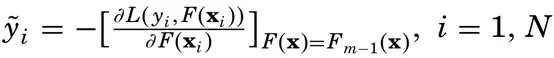

其中L代表Loss Function，為計算當前方程式F和實際值y的誤差值，所以在這個式子我們可以把他理解成我們的殘差值就是誤差值的梯度，所以我們根據這個誤差值的梯度(殘差值)，訓練一個Regressor來擬和，最後再將這些預測的殘差值加上原有的方程式F，我們就可以將F慢慢逼近y。

而這個演算法也因為運用梯度的概念逼近我們的答案，所以我們才會把它叫做Gradient Boost梯度提升。



**Python 實作 GBT**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# 構建梯度提升樹
gb_clf = GradientBoostingClassifier(n_estimators=100)
gb_clf = gb_clf.fit(X, y)

# 預測
y_pred = gb_clf.predict(X)

# 模型評估
print("Accuracy:", accuracy_score(y, y_pred))


Accuracy: 1.0


參考：

1. [機器學習_學習筆記系列(35)：梯度提升(Gradient Boost)
](https://tomohiroliu22.medium.com/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E5%AD%B8%E7%BF%92%E7%AD%86%E8%A8%98%E7%B3%BB%E5%88%97-35-%E6%A2%AF%E5%BA%A6%E6%8F%90%E5%8D%87-gradient-boost-39536c3c8e03)

2. [機器學習_學習筆記系列(42)：梯度提升決策樹分類(Gradient Boosted Decision Tree Classifier)
](https://tomohiroliu22.medium.com/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E5%AD%B8%E7%BF%92%E7%AD%86%E8%A8%98%E7%B3%BB%E5%88%97-42-%E6%A2%AF%E5%BA%A6%E6%8F%90%E5%8D%87%E6%B1%BA%E7%AD%96%E6%A8%B9%E5%88%86%E9%A1%9E-gradient-boosted-decision-tree-classifier-37fc0f1c17c3)

3. [機器學習_學習筆記系列(43)：梯度提升決策樹回歸(Gradient Boosted Decision Tree Regressor)
](https://tomohiroliu22.medium.com/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E5%AD%B8%E7%BF%92%E7%AD%86%E8%A8%98%E7%B3%BB%E5%88%97-43-%E6%A2%AF%E5%BA%A6%E6%8F%90%E5%8D%87%E6%B1%BA%E7%AD%96%E6%A8%B9%E5%9B%9E%E6%AD%B8-gradient-boosted-decision-tree-regressor-c0e45cab6074)

#### XGBoost



**XGBoost 的基本概念**

XGBoost 是一種基於梯度提升的強大機器學習算法，具有高效能和高準確性的特點。

**XGBoost 的優缺點**

**優點：**

* 高效能
* 高準確性
* 支持並行計算

**缺點：**

* 對參數調整要求高

**XGBoost 的構建原理**

XGBoost 使用二次泰勒展開來優化目標函數，並支持正則化來防止過擬合。

**Python 實作 XGBoost**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 分割數據集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 構建 XGBoost 模型
xgb_clf = xgb.XGBClassifier(n_estimators=100)
xgb_clf = xgb_clf.fit(X_train, y_train)

# 預測
y_pred = xgb_clf.predict(X_test)

# 模型評估
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


#### LightGBM**

**LightGBM 的基本概念**

LightGBM 是一種基於決策樹算法的快速、分布式、高效的梯度提升框架。

**LightGBM 的優缺點**

**優點：**

* 訓練速度快
* 占用內存少

**缺點：**

* 對小數據集效果不佳

**LightGBM 的構建原理**

LightGBM 使用葉子智慧增長策略來構建決策樹，優化訓練速度和內存使用。

**Python 實作 LightGBM**

In [ ]:
import lightgbm as lgb

# 構建 LightGBM 模型
lgb_clf = lgb.LGBMClassifier(n_estimators=100)
lgb_clf = lgb_clf.fit(X_train, y_train)

# 預測
y_pred = lgb_clf.predict(X_test)

# 模型評估
print("Accuracy:", accuracy_score(y_test, y_pred))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000137 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 91
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.073920
[LightGBM] [Info] Start training from score -1.123930
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth